In [1]:
import sklearn.manifold as mn
from sklearn import datasets
import matplotlib.pyplot as plt

from mlxtend.data import loadlocal_mnist
import numpy as np

In [3]:
k=5
np.eye(k)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [360]:
def active_dataset(b):
    if b==0 :
        IRIS = True
        MNIST = False
        print("iris activé")
        return "IRIS"
    else :
        IRIS = False
        MNIST = True        
        print("mnist activé")
        return "MNIST"

In [369]:
def get_data(dataset):
    if dataset == "IRIS":
        titre ='IRIS'
        iris = datasets.load_iris()
        X = iris.data  
        y = iris.target
        N = X.shape[0]
        n_components = 2
        n_neighbors = 2
        return titre, iris, X, y, N, n_components, n_neighbors

    elif dataset == "MNIST":
        titre = 'MNIST'
        # load the digit MNIST dataset
        datas = loadlocal_mnist(
                images_path='train-images-idx3-ubyte', 
                labels_path='train-labels-idx1-ubyte')
        X, y = loadlocal_mnist(
                images_path='train-images-idx3-ubyte', 
                labels_path='train-labels-idx1-ubyte')
        N=1000
        n_components = 2
        n_neighbors = 20

        D=28
        image_d = np.array(X[0],dtype='uint')
        data = image_d.reshape((D,D))
        plt.imshow(data, cmap='gray')
        plt.show()
        return titre, datas, X, y, N, n_components, n_neighbors

In [6]:
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

Dimensions: 150 x 4
labels: [0 1 2]
Class distribution: [50 50 50]


In [7]:
def LLE_sklearn(n_neighbors, n_components):
    
    embedding = mn.LocallyLinearEmbedding(n_neighbors, n_components, method="standard")
    X_transformed = embedding.fit_transform(X[0:N]) # X_transformed = Y la matrice des projetés

    fig, ax = plt.subplots()
    scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=y[0:N], cmap=plt.cm.Set1)
    legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre)
    ax.add_artist(legend1) 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=2, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


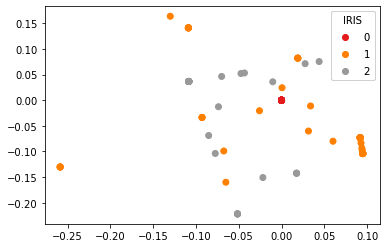

In [9]:
LLE_sklearn(n_neighbors, n_components)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


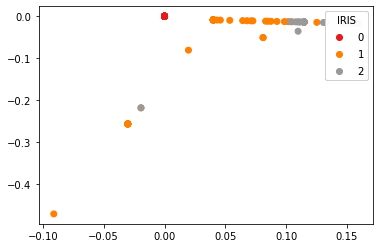

In [10]:
LLE_sklearn(3,2)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=4, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


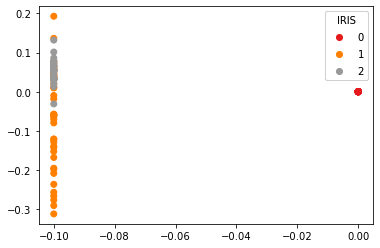

In [11]:
LLE_sklearn(4, n_components)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=8, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


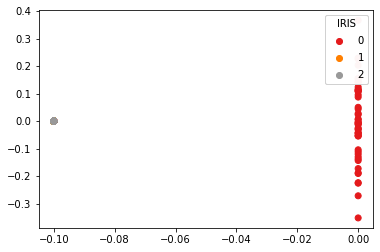

In [69]:
LLE_sklearn(8, 2)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3, n_components=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


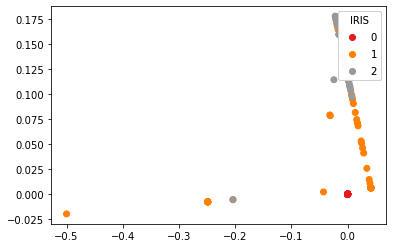

In [70]:
LLE_sklearn(3, 3)

les 50 points de la classe 0 se trouve au même niveau de ce point là !

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=5, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


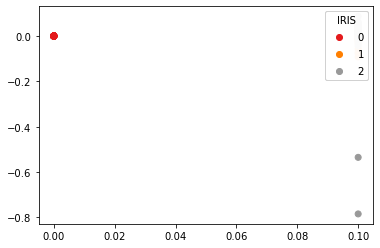

In [12]:
LLE_sklearn(5, n_components)

# autre

Dimensions: 150 x 4
labels: [0 1 2]
Class distribution: [50 50 50]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=3, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


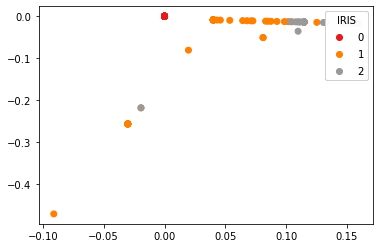

In [112]:
if IRIS:
    titre ='IRIS'
    iris = datasets.load_iris()
    X = iris.data  
    y = iris.target
    N = X.shape[0]
    n_components = 2
    n_neighbors = 3

elif MNIST:
    titre = 'MNIST'
    # load the digit MNIST dataset
    X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')
    N=1000
    n_components = 2
    n_neighbors = 20

    #D=28
    #image_d = np.array(X[0],dtype='uint')
    #data = image_d.reshape((D,D))
    #plt.imshow(data, cmap='gray')
    #plt.show()

print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('labels: %s' % np.unique(y))
print('Class distribution: %s' % np.bincount(y))

embedding = mn.LocallyLinearEmbedding(n_neighbors, n_components)
X_transformed = embedding.fit_transform(X[0:N])

fig, ax = plt.subplots()
scatter = ax.scatter(X_transformed[:,0], X_transformed[:,1], c=y[0:N], cmap=plt.cm.Set1)
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title=titre)
ax.add_artist(legend1) 

# TP

#### Compréhension

In [42]:
D = [[0], [3], [1]]

In [43]:
A = kneighbors_graph(D, 2, mode='connectivity')

In [44]:
A.toarray()

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [45]:
print(A)

  (0, 2)	1.0
  (0, 1)	1.0
  (1, 2)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (2, 1)	1.0


inteprétation :

le point D[0]="0", est à l'indice 0 (, ligne1 et la colonne 1

In [47]:
A = kneighbors_graph(D, 2, mode='distance')

In [48]:
A.toarray()

array([[0., 3., 1.],
       [3., 0., 2.],
       [1., 2., 0.]])

In [50]:
A.indices # Voisins (Valeurs du graphe)

array([2, 1, 2, 0, 0, 1], dtype=int32)

In [51]:
A.data # Poids

array([1., 3., 2., 3., 1., 2.])

In [49]:
print(A)

  (0, 2)	1.0
  (0, 1)	3.0
  (1, 2)	2.0
  (1, 0)	3.0
  (2, 0)	1.0
  (2, 1)	2.0


In [64]:
k = 2 #voisins
n = 3 #samples
D = np.array(D)
matrice_N = np.zeros((n,k))
for i in range(n):
        for j in range(k):
            matrice_N[:,j] = D[A.indices[i*k+j],:].T

In [65]:
matrice_N

array([[0., 3.],
       [0., 3.],
       [0., 3.]])

inteprétation :

le point D[0]="0", est à l'indice 0 (Valeur du graphe), 

à la ligne 3 (Index de laligne avec un indicateur qui nous donne le nombre de valeurs non nuls) et,

à la colonne  1 (l'index de la colonne)

Enfin, pour le sommet (Node) 0, on a entre les 2 voisins un poids de 1 avec le troisième node (2) et 3 avec le deuxième Node (1)

La fonction renvoie alors : Une matrice creuse de forme (n_échantillons, n_échantillons)
Graphique où A[i, j] se voit attribuer le poids de l'arête qui relie i à j. La matrice est au format CSR(Compressed Sparse Row).

### Etape 1

In [15]:
from sklearn.neighbors import kneighbors_graph

In [104]:
from scipy.linalg import eigh

In [105]:
def get_kng(X, k):
    kng = kneighbors_graph(X, k, mode="distance")
    print(kng)
    # kng.indices
    # kng.shape
    return kng

In [106]:
get_kng(X,3)

  (0, 17)	0.09999999999999998
  (0, 4)	0.1414213562373093
  (0, 39)	0.14142135623730964
  (1, 34)	0.14142135623730964
  (1, 45)	0.14142135623730986
  (1, 12)	0.1414213562373099
  (2, 47)	0.14142135623730978
  (2, 3)	0.24494897427831802
  (2, 12)	0.264575131106459
  (3, 47)	0.14142135623730964
  (3, 29)	0.17320508075688812
  (3, 30)	0.22360679774997916
  (4, 37)	0.14142135623730925
  (4, 0)	0.1414213562373093
  (4, 17)	0.17320508075688756
  (5, 18)	0.33166247903553986
  (5, 10)	0.3464101615137753
  (5, 48)	0.36055512754639896
  (6, 47)	0.22360679774997871
  (6, 2)	0.264575131106459
  (6, 11)	0.3000000000000002
  (7, 39)	0.09999999999999964
  (7, 49)	0.14142135623730964
  (7, 0)	0.17320508075688762
  (8, 38)	0.14142135623730948
  :	:
  (141, 112)	0.4690415759823433
  (142, 101)	0.0
  (142, 113)	0.26457513110645897
  (142, 121)	0.31622776601683755
  (143, 120)	0.22360679774997935
  (143, 124)	0.31622776601683766
  (143, 144)	0.31622776601683794
  (144, 140)	0.24494897427831785
  (144, 120

<150x150 sparse matrix of type '<class 'numpy.float64'>'
	with 450 stored elements in Compressed Sparse Row format>

# Algorithme

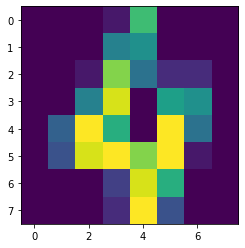

In [150]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

n_class = 10

X,y = load_digits(n_class=n_class, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.imshow(X[4].reshape(8,8))

In [246]:
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import inv
from sklearn.neighbors import kneighbors_graph

In [326]:
def LLE(X, k, compo, alpha=0.001):
    
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)
    indices = indices[:, 1:]    
    N = len(X)
    W = np.zeros((N, N))
    I = np.eye(k-1,k-1)
    
    for i in range(N):
        Xj = X[indices[i], :]
        Gi = (Xj - X[i])@(Xj - X[i]).T
        l = inv(Gi + alpha*I )
        w = l.sum(axis=1)/l.sum()
        W[i, indices[i]] = w
        
    In = np.eye(N)
    M = (In-W).T@(In-W)
    
    if M.shape[0] > 200 and k + k_skip < 10:
        return eigsh(M, k + 1, sigma=0.0, tol=1E-6, maxiter=100)
    else:
        return eigh(M, eigvals=(1, k), overwrite_a=True)
    
    return Exception("Il y'a un problème au niveau de ", LLE)

In [327]:
lle = LLE(X, 3, 2,0.000001)

In [328]:
lle[0].shape

(3,)

In [329]:
Lp = lle[0].reshape((-1,1))

In [330]:
Vp.shape

(150, 150)

In [331]:
lle[1].shape

(150, 3)

In [332]:
Vp = lle[1]

In [333]:
def lle_display(lle,titre,N):
    Lp = lle[0].reshape((-1,1))
    Vp = lle[1]
    fig, ax = plt.subplots()
    scatter = ax.scatter(Vp[:,0], Vp[:,1], c=y[0:N], cmap=plt.cm.Set1)
    #legend1 = ax.legend(*scatter.legend_elements(),loc="upper right")
    legend1 = ax.legend(title='my '+titre)
    ax.add_artist(legend1)

No handles with labels found to put in legend.


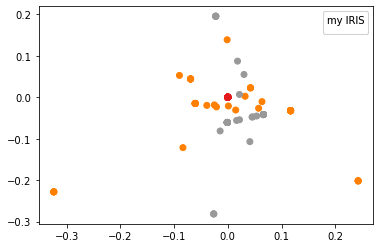

In [334]:
lle_display(lle,titre,N)

In [335]:
lle = LLE(X, 2, 2, 0.00001)

No handles with labels found to put in legend.


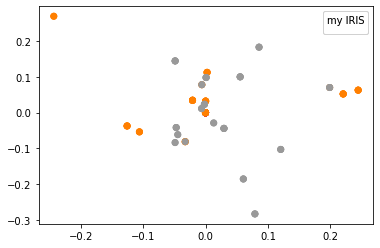

In [336]:
lle_display(lle,titre,N)

In [337]:
lle = LLE(X, 3, 3, 0.00001)

No handles with labels found to put in legend.


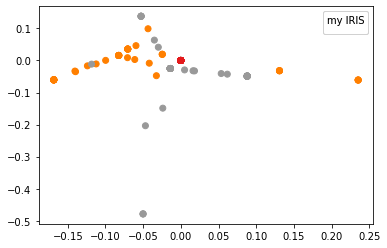

In [338]:
lle_display(lle,titre,N)

No handles with labels found to put in legend.


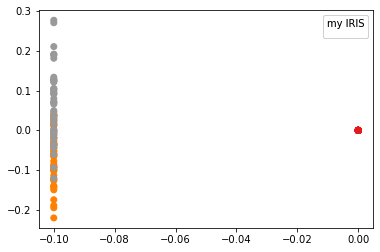

In [343]:
lle = LLE(X, 8, 2, 0.00001)
lle_display(lle,titre,N)

In [366]:
data = active_dataset(0)

iris activé


In [367]:
data

'IRIS'

In [370]:
titre, datas, X, y, N, n_components, n_neighbors = get_data(data)

No handles with labels found to put in legend.


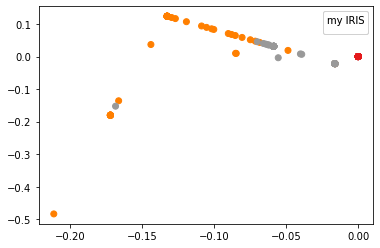

In [372]:
lle = LLE(X, 4, 2, 0.00001)
lle_display(lle,titre,N)